## Exploring Why Civil Resistance Works

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
filepath = 'data/WCRWreplication.dta'
data = pd.read_stata(filepath)

In [3]:
data.shape

(323, 85)

In [4]:
data.columns

Index(['defect', 'outcome', 'peakmembership', 'eyear', 'byear', 'location',
       'campaign', 'target', 'lccode', 'tccode', 'nonviol', 'viol', 'fselfdet',
       'regchange', 'secession', 'other', 'success', 'limited', 'failure',
       'ongoing', 'middleeast', 'americas', 'asia', 'fsu', 'europe', 'africa',
       'lpolity', 'tpolity', 'lgovcap', 'tgovcap', 'regviol', 'violsim',
       'extfor', 'statesup', 'regaid', 'sdirect', 'deltatpolity', 'deltatgdp',
       'lduration', 'lmembers', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',
       't9', 't10', 't11', 'cw', 'postcw', 'ixnNVmem', 'rgdppc',
       'growthrgdppc', 'lupop', 'recur5', 'recur10', 'polityt10', 'polityt1',
       'polityt5', 'politychanget10', 'politychanget1', 'politychanget5',
       'politychanget0', 'authdum', 'deltatgovcap', 'memdum', 'lnpop',
       'ixnNVpc', 'lpolity1', 'lcinc1', 'lgdppc', 'wars', 'lmtnest', 'ef',
       'loclpolity1', 'loclcap1', 'loclcap2', 'loclcap3', 'loclcap4', 'mempc',
       'demdum',

### Question 1

In [5]:
violgroup = data.groupby(['eyear', 'viol']).count()
violgroup.reset_index(inplace=True)

#maybe this is not needed
nonviolgroup = data.groupby(['eyear', 'nonviol']).count()
nonviolgroup.reset_index(inplace=True)

In [7]:
violent = violgroup.loc[violgroup.viol == 1]
nonviolent = violgroup.loc[violgroup.viol == 0]

In [8]:
nonviolent.head()

,eyear,viol,defect,outcome,peakmembership,byear,location,campaign,target,lccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
11,1919,0,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
16,1923,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
23,1931,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
30,1944,0,4,4,2,4,4,4,4,4,...,0,0,2,2,2,2,2,0,3,0
32,1945,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [9]:
violdec = violent.groupby((violent.eyear//10)*10).sum()
nonvioldec = nonviolent.groupby((nonviolent.eyear//10)*10).sum()

In [10]:
nonvioldec

,eyear,viol,defect,outcome,peakmembership,byear,location,campaign,target,lccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1910,1919,0,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
1920,1923,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
1930,1931,0,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
1940,3889,0,5,5,3,5,5,5,5,5,...,0,0,2,2,2,2,2,0,4,0
1950,11733,0,9,9,5,9,9,9,9,9,...,6,6,6,5,5,5,5,3,7,7
1960,9821,0,7,7,5,7,7,7,7,7,...,5,5,6,5,5,5,5,4,7,5
1970,9867,0,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,6,7
1980,17861,0,32,32,22,32,32,32,32,32,...,28,28,28,28,28,28,28,18,32,28
1990,15952,0,23,23,19,23,23,23,23,23,...,17,17,18,17,17,17,17,18,23,18


Text(0, 0.5, 'campaigns')

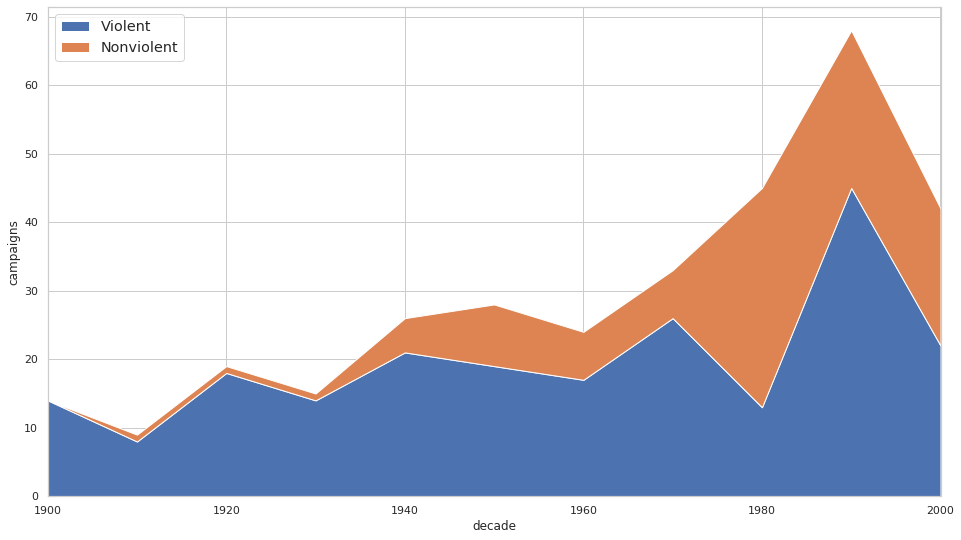

In [11]:
# ion = np.insert(nonvioldec.outcome.values, 0, 10)
# ion
# violdec.outcome.values
sns.set(style="whitegrid")
ion = np.insert(nonvioldec.outcome.values, 0, 0) #no data on it?
nonvioldec.index.shape
plt.figure(figsize=(16,9))
plt.stackplot(violdec.index, violdec.outcome.values, ion, labels=['Violent', 'Nonviolent'])
plt.legend(loc='upper left', fontsize = 'large')
plt.xlim(1900, 2000)
plt.xlabel('decade')
plt.ylabel('campaigns')

### Question 2

In [97]:
# get the values from 1940 and after
x = nonvioldec.index[3:]
y1 = nonvioldec.outcome.values[3:]

In [98]:
non = data.loc[(data.viol == 0) & (data.outcome == 5)]
group = non.groupby('eyear').count()
group.reset_index(inplace=True)
groupdec = group.groupby((group.eyear//10)*10).sum()
groupdec[3:6]

,eyear,defect,outcome,peakmembership,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1950,5874,3,3,0,3,3,3,3,3,3,...,1,1,1,1,1,1,1,0,2,2
1960,3923,3,3,2,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,3,2
1970,5926,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,3,4


In [99]:
nonvioldec[4:7]

,eyear,viol,defect,outcome,peakmembership,byear,location,campaign,target,lccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1950,11733,0,9,9,5,9,9,9,9,9,...,6,6,6,5,5,5,5,3,7,7
1960,9821,0,7,7,5,7,7,7,7,7,...,5,5,6,5,5,5,5,4,7,5
1970,9867,0,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,6,7


In [286]:
perc = groupdec/nonvioldec

In [287]:
perc.outcome

eyear
1910         NaN
1920    1.000000
1930    1.000000
1940    0.400000
1950    0.333333
1960    0.428571
1970    0.571429
1980    0.531250
1990    0.521739
2000    0.700000
Name: outcome, dtype: float64

In [102]:
# get the values from 1940 and after
y2 = perc.outcome.values[3:]

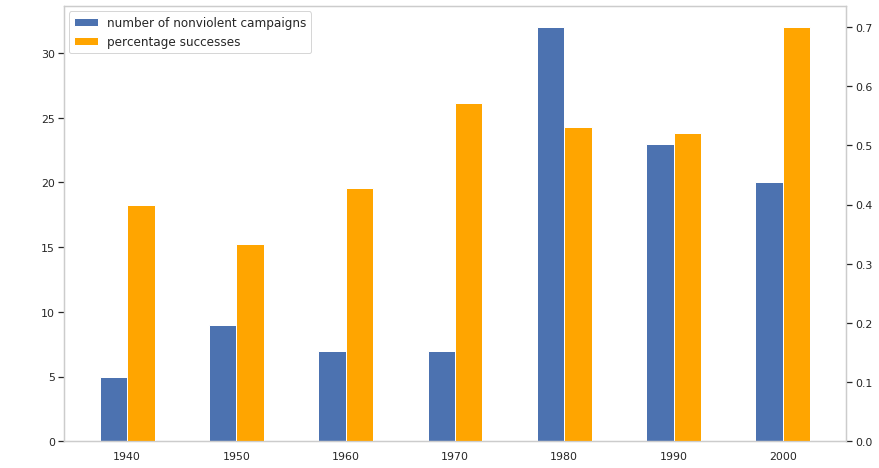

In [256]:
width = 2.5  # the width of the bars

fig = plt.figure(figsize=[14,8])
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
number = ax1.bar(x - width/2, y1, width, color='b', label='number of nonviolent campaigns')
ax1.grid(False)
percentage = ax2.bar(x + width/2, y2, width, color='orange', label='percentage successes')
ax2.grid(False)

fig.legend(bbox_to_anchor=(0.0623, 0.803), loc='upper left', fontsize=12)

#How do I do the legend appending?
# axs = number+percentage
# labs = [l.get_label() for l in axs]
# ax1.legend(axs, labs, loc=0)

## We only need to calculate the percentages for the violent campaigns

In [257]:
vio = data.loc[(data.viol == 1) & (data.outcome == 5)]
group = vio.groupby('eyear').count()
group.reset_index(inplace=True)
groupdec2 = group.groupby((group.eyear//10)*10).sum()
groupdec2[3:6]

,eyear,defect,outcome,peakmembership,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
eyear,,,,,,,,,,,,,,,,,,,,,
1930,3871,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,0,2,0
1940,5837,7,7,5,7,7,7,7,7,7,...,3,2,5,5,5,5,5,0,6,5
1950,7821,7,7,5,7,7,7,7,7,7,...,3,3,3,3,3,3,3,5,6,4


In [297]:
vioperc = groupdec2/violdec

In [298]:
x = vioperc.index[4:]
y1 = vioperc.outcome.values[4:]
y2 = perc.outcome.values[3:]
y1

array([0.33333333, 0.36842105, 0.23529412, 0.38461538, 0.38461538,
       0.26666667, 0.13636364])

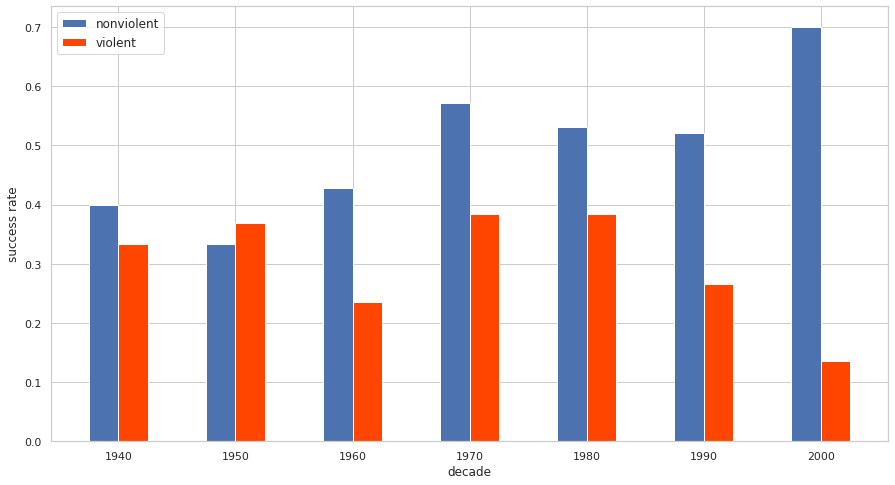

In [320]:
width = 2.5  # the width of the bars

fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111)
b2 = ax.bar(x + width/2, y1, width, color='orangered')
b1 = ax.bar(x - width/2, y2, width, color='b')

plt.xlabel('decade')
plt.ylabel('success rate')
ax.legend((b1[0], b2[0]), ('nonviolent', 'violent'), fontsize=12)


## Question 4

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

In [331]:
peakcamp = data.loc[:, ['peakmembership', 'eyear', 'byear', 'location', 'target']]

peakcamp.sort_values(by='peakmembership', ascending=False)[:25]

,peakmembership,eyear,byear,location,target
257,4500000.0,1945,1937,China,Japanese occupation
206,2000000.0,1979,1977,Iran,Shah Reza Pahlavi
311,2000000.0,1983,1986,Philippines,Ferdinand Marcos
289,1000000.0,1988,1988,Burma,military junta
265,1000000.0,1989,1989,China,Communist regime
262,1000000.0,1968,1967,China,anti-Maoists
255,1000000.0,1949,1922,China,Kuomintang regime
10,1000000.0,2006,2006,Mexico,Calderon regime
228,1000000.0,2005,2005,Lebanon,Syrian forces
141,1000000.0,1999,1993,Nigeria,Military rule


## Question 5

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the 𝑥
axis, and the probability of success, on the 𝑦 axis. 

In [362]:
data.mempc.isnull().sum()

160

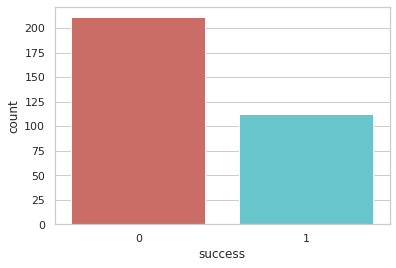

In [365]:
data.success.value_counts()
sns.countplot(x = 'success', data = data, palette = 'hls')
plt.show()

In [366]:
x = data.success
y = data.mempc
url = 'https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125'

In [367]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [348]:
data.success

0      1
1      0
2      1
3      0
4      0
      ..
318    0
319    1
320    1
321    1
322    0
Name: success, Length: 323, dtype: int8

In [339]:
from statsmodels.formula.api import logit

In [349]:
success_mod = logit("success ~ mempc", data).fit()
success_mod.summary()

Optimization terminated successfully.
         Current function value: 0.596317
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  163
Model:                          Logit   Df Residuals:                      161
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Nov 2019   Pseudo R-squ.:                  0.1271
Time:                        12:33:20   Log-Likelihood:                -97.200
converged:                       True   LL-Null:                       -111.35
Covariance Type:            nonrobust   LLR p-value:                 1.033e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6570      0.954     -4.882      0.000      -6.527      -2.787
mempc          4.2110      0.898      4.689      0.000       2.451       5.971
==============================================================================
"""

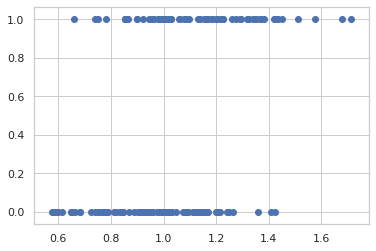

In [347]:
plt.scatter(data.mempc, data.success)

In [ ]:
data.